 # Exploração e Análise de Dados de Crédito Utilizando SQL
 

**Colunas usadas nessa tabela.**

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

## **Exploração de Dados:**

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

Query: SELECT count(*) FROM credito
> Reposta: 2564 linhas

**OBS:** A base de dados do link acima contém um número de linhas superior à seleção utilizada. Essa redução foi implementada com o objetivo de assegurar que o projeto se tornasse menos propenso a erros, ao mesmo tempo em que proporciona maior organização. A intenção do projeto é transmitida de maneira clara, beneficiando-se de uma quantidade adequada de dados para uma análise eficaz.

**Como são os dados?**
>**Query:** SELECT * FROM credito LIMIT 10;

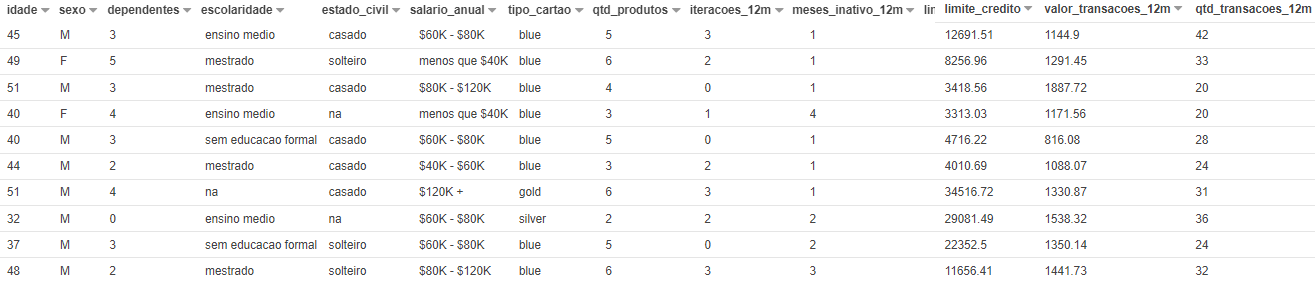

**Quais os tipos de cada dado?**
>**Query:** DESCRIBE credito

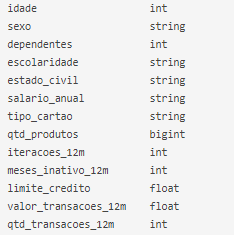

Agora que compreendemos os tipos de dados, é hora de examinar de forma mais detalhada as variáveis que não possuem natureza numérica.

**Quais são os tipos de escolaridade disponíveis no dataset?**
>**Query:** SELECT DISTINCT escolaridade FROM credito

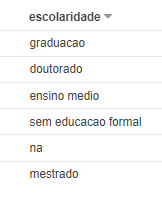

**Nota:** Os dados abrangem diversos níveis de escolaridade, e é evidente a presença de valores nulos (NA) no conjunto de dados. Abordaremos essa questão posteriormente!

**Quais são os tipos de estado_civil disponíveis no dataset?**
>**Query:** SELECT DISTINCT estado_civil  FROM credito

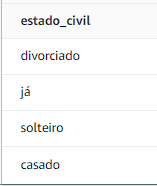

**Obs:** "já" seria um valor nulo presente também nesse conjunto de dados.

**Quais são os tipos de salario_anual disponíveis no dataset?**
>**Query:** SELECT DISTINCT salario_anual  FROM credito

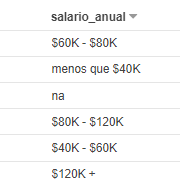

**Nota:** Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.

**Quais são os tipos de cartão disponíveis no dataset?**
>**Query:** SELECT DISTINCT tipo_cartao  FROM credito

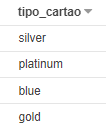

**Nota:** Aqui vemos que não há necessidade de tratar valores nulos.

## **Análise de Dados:**
Após explorarmos os dados e procurarmos compreender as informações contidas em nosso banco de dados, podemos agora analisar esses dados para compreender o contexto do banco de dados. Vamos formular as seguintes perguntas:

**Nesse banco de dados, quantos clientes temos de cada faixa salarial?**
>**Query:**  select count(*) as quantidade_faixa, salario_anual from credito group by salario_anual

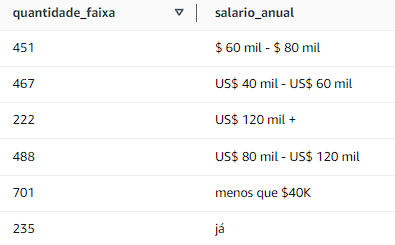

**Nota:** A maior parte dos clientes nesta base de dados apresenta uma renda inferior a 40 mil, com 235 clientes que não forneceram informações ou cuja faixa salarial não está registrada. Em certa medida, direcionar esforços para esse público de menor renda pode ser uma estratégia interessante para a empresa.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**
>**Query:** select count(*) as quantidade, sexo from credito group by sexo

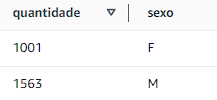

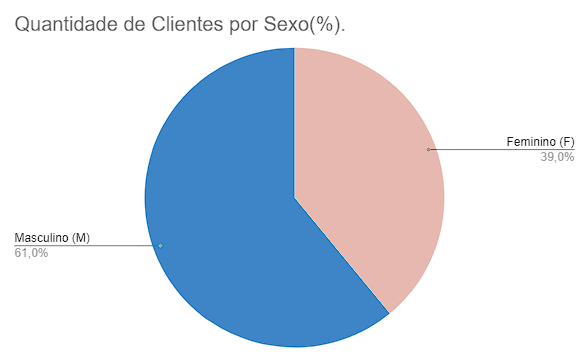

**Nota:** A predominância de clientes neste banco é do sexo masculino. A partir do CSV com os dados extraídos, é viável criar um gráfico em pizza para visualizar de maneira mais clara a proporção entre os gêneros masculino e feminino.

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**
>**Query:** select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

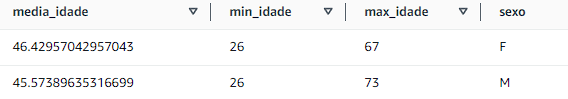

**Nota:** A análise realizada não revelou informações significativas. A menor idade entre ambos os sexos é idêntica, e as médias são muito semelhantes. A única discrepância observada é a idade máxima, mas essa diferença é praticamente irrelevante, já que não apresenta uma disparidade significativa.

**Qual a maior e menor transação dos clientes?**
>**Query:** select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito

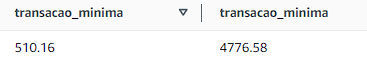

**Nota:** Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 5776.58.

**Quais as características dos clientes que possuem os maiores creditos?**
>**Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

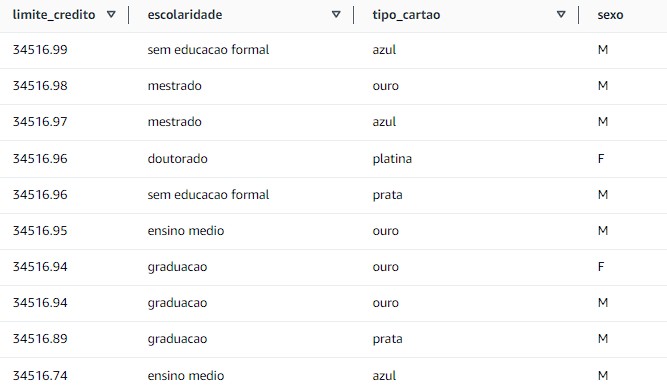

**Nota:** Não parece haver uma correlação entre o nível de escolaridade e o limite de crédito. Nota-se que o limite mais elevado é concedido a um homem sem educação formal. Além disso, não parece haver uma associação clara entre o tipo de cartão e a escolaridade, nem entre o tipo de cartão e o limite. Entre os limites mais elevados, encontramos clientes com diferentes tipos de cartão, como gold, silver, platinum e blue.

**Quais as características dos clientes que possuem os menores creditos?**
> **Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc

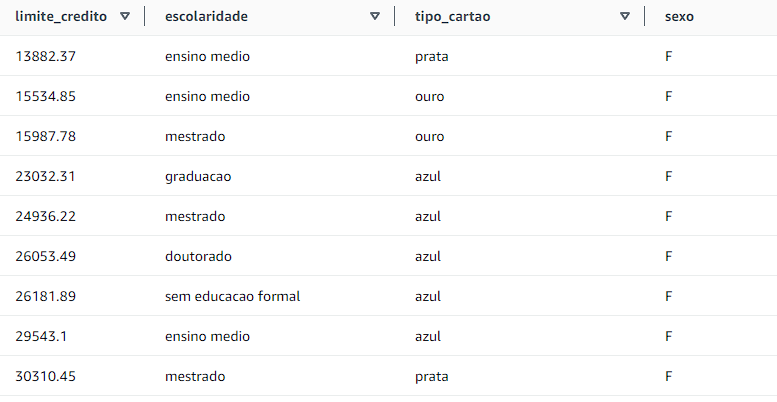

**Nota:** Nesta análise, observamos que não há clientes com cartão platinum entre aqueles que possuem os menores limites. Além disso, notamos que a maioria dos clientes com os menores limites são mulheres, enquanto nos limites mais elevados a predominância é de homens.

**Será que as mulheres gastam mais?**
>**Query:** select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

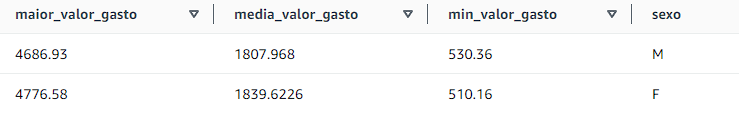

**Nota:** Mesmo havendo variação nos limites de crédito, as despesas entre homens e mulheres mostram-se bastante semelhantes!

Por último, abordamos a seguinte questão:
**O salário tem algum impacto no limite de crédito?**
>**Query:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

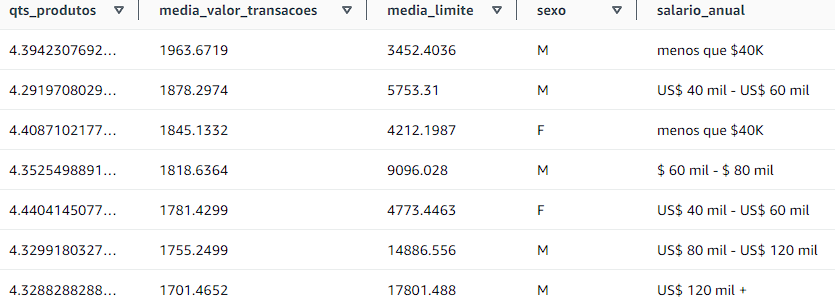

**Nota:** Sim, é possível estabelecer uma clara relação entre a faixa salarial e o limite de crédito, indicando que indivíduos com rendimentos mais baixos tendem a ter limites de crédito inferiores. Essa observação sugere uma influência direta do salário na determinação dos limites de crédito, sendo um fator relevante na concessão desse benefício financeiro. Essa constatação pode ter implicações significativas para a análise de risco e estratégias de gestão de crédito, destacando a importância de considerar a capacidade financeira dos clientes ao estabelecer limites de crédito.

## **Conclusão:**
Aqui estão **algumas** análises provenientes do conjunto de dados de crédito, fornecendo insights relevantes:

- A maioria dos clientes possui uma renda de até 40 mil.

- A predominância entre os clientes é do sexo masculino.

- A escolaridade não parece ter influência no limite de crédito nem no tipo de cartão.

- Os clientes com os maiores limites são predominantemente do sexo masculino.

- Os clientes com os menores limites são principalmente do sexo feminino.

- Entre os clientes com menores limites, não há a presença do cartão platinum.

- A faixa salarial impacta diretamente no limite de crédito.

- Não há clientes do sexo feminino com salário anual acima de 60 mil.

**Uma análise mais aprofundada dos dados pode explicar a discrepância nos limites de crédito entre homens e mulheres. Além disso, esse padrão pode estar relacionado a questões culturais que merecem uma reconsideração!**